<a href="https://colab.research.google.com/github/Des-PM/DA/blob/main/Job_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE  # imblearn library can be installed using pip install imblearn
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dataz
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Importing dataset and examining it
df = pd.read_csv("/content/NaukriDataJObs.csv")
pd.set_option('display.max_columns',None) #Will ensure that all columns are displayed

In [ ]:
#Display the top 5 rows
df.head()


,Title,CompanyName,Vacancy Link,Experience Needed,Salary in Rs,Skill,Location,Career Level
0,Manufacturing Data Science Lead,Mondelez,https://www.naukri.com/job-listings-manufactur...,4-8 Yrs,Not disclosed,Statistical programming\nNeural networks\nMach...,Mumbai,Middle
1,Associate Solution Leader - Data Science,Brane Enterprises,https://www.naukri.com/job-listings-associate-...,5-10 Yrs,"14,00,000 - 20,00,000 PA.",Computer Vision\nIT Skills\nPython\nQuality As...,Hybrid - Hyderabad/Secunderabad,Middle
2,Lead Instructor - Data Science,Scaler Academy,https://www.naukri.com/job-listings-lead-instr...,1-6 Yrs,Not disclosed,Power house\nHealth insurance\nB2C\ndata scien...,Bangalore/Bengaluru,Entry
3,Data Science Analyst (From FMCG Ind.)and Sales...,H K Jewels,https://www.naukri.com/job-listings-data-scien...,3-5 Yrs,"3,00,000 - 3,50,000 PA.",SAP\nData Management\nData Analysis\nData Anal...,Mumbai,Entry
4,Analyst - Applied Data Science,Tesco Bengaluru,https://www.naukri.com/job-listings-analyst-ap...,1-3 Yrs,Not disclosed,Microstrategy\nBusiness services\nData modelin...,Bangalore/Bengaluru,Entry


In [ ]:
df.shape
df.describe() # Quick Description of the data

,Heading,Sub Heading,Vacancy Link,Experience Needed,Salary,skill
count,9534,9534,9534,9534,9534,9534
unique,5334,3680,9407,145,302,5651
top,Business Analyst,Huquo Consulting Pvt. Ltd,https://www.naukri.com/job-listings-actuarial-...,5-10 Yrs,Not disclosed,No description
freq,1067,376,2,671,8521,205


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Heading            9534 non-null   object
 1   Sub Heading        9534 non-null   object
 2   Vacancy Link       9534 non-null   object
 3   Experience Needed  9534 non-null   object
 4   Salary             9534 non-null   object
 5   skill              9534 non-null   object
dtypes: object(6)
memory usage: 447.0+ KB


In [ ]:
df=df.drop(columns='Vacancy Link')

In [ ]:
df.head()

,Heading,Sub Heading,Experience Needed,Salary,skill
0,Actuarial Analyst,Tresbien Hr Consultancy,3-8 Yrs,"5,00,000 - 12,00,000 PA.",Data analysis\nArchitecture\ndevops\nConsultin...
1,Actuarial Analyst,Tresbien Hr Consultancy,3-8 Yrs,"5,00,000 - 12,00,000 PA.",Automation\nProcess optimization\nAnalytical\n...
2,AD-Market Risk,KPMG India,12-17 Yrs,Not disclosed,IT Skills\nSalesforce\nBusiness process\nData ...
3,AD-Market Risk,KPMG India,12-17 Yrs,Not disclosed,Automation\nTechnical management\nUsage\nExcel...
4,Advance Analytics Manager,Essence Digital,3-5 Yrs,Not disclosed,Consulting\nQuality audit\nApplication develop...


In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [ ]:
df['Experience Needed'] = df['Experience Needed'].apply(lambda x: x.split(' ')[0])

In [ ]:
df['skill'] = df['skill'].apply(lambda x: x.split('\n'))

In [ ]:
import plotly.express as px
import plotly.offline as py


In [ ]:
#Plotting Job Count by each city
Location_df = df['Location'].value_counts()
Location_df = Location_df.reset_index()
Location_df.columns = ['Location','Count']

fig = px.bar(Location_df, x='Location', y='Count', color='Count',
            title = '<b>Job Posting Citywise<b>')

fig.update_xaxes(title_text='City')
fig.update_yaxes(title_text='No of Jobs')

py.iplot(fig)

In [ ]:
df['Location'] = df.Location.str.replace(r'(^.*Ahmedabad.*$)','Ahmedabad')
df['Location'] = df.Location.str.replace(r'(^.*Bengaluru.*$)','Bengaluru')
df['Location'] = df.Location.str.replace(r'(^.*Chennai.*$)','Chennai')
df['Location'] = df.Location.str.replace(r'(^.*Chandigarh.*$)','Chandigarh')
df['Location'] = df.Location.str.replace(r'(^.*NCR.*$)','Delhi')
df['Location'] = df.Location.str.replace(r'(^.*Delhi.*$)','Delhi')
df['Location'] = df.Location.str.replace(r'(^.*Gurgaon.*$)','Gurgaon')
df['Location'] = df.Location.str.replace(r'(^.*Karnataka.*$)','Karnataka')
df['Location'] = df.Location.str.replace(r'(^.*Hyderabad.*$)','Hyderabad')
df['Location'] = df.Location.str.replace(r'(^.*Indore.*$)','Indore')
df['Location'] = df.Location.str.replace(r'(^.*Kolkata.*$)','Kolkata')
df['Location'] = df.Location.str.replace(r'(^.*Jaipur.*$)','Jaipur')
df['Location'] = df.Location.str.replace(r'(^.*Kerala.*$)','Kochi')
df['Location'] = df.Location.str.replace(r'(^.*Kochi.*$)','Kochi')
df['Location'] = df.Location.str.replace(r'(^.*Mumbai.*$)','Mumbai')
df['Location'] = df.Location.str.replace(r'(^.*Noida.*$)','Noida')
df['Location'] = df.Location.str.replace(r'(^.*Pune.*$)','Pune')

In [ ]:
cities = ['Ahmedabad','Bengaluru','Chennai','Chandigarh','Karnataka','Hyderabad','Indore','Kolkata','Jaipur','Kochi','Mumbai','NCR','Pune']

df = df[df['Location'].isin(cities)]

In [ ]:
location_df = df['Location'].value_counts()
location_df = location_df.reset_index()
location_df.columns = ['Location','Count']

fig = px.bar(location_df, x='Location', y='Count', color='Count',
            title = '<b>Job Posting Citywise<b>')

fig.update_xaxes(title_text='City')
fig.update_yaxes(title_text='No of Jobs')

py.iplot(fig)

In [ ]:
#install geopython libraries
!apt install gdal-bin python-gdal python3-gdal
#install python3-rtree - Geopandas requirement
!apt install python3-rtree 
#install geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#install descartes - Geopandas requirement
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (6,301 kB/s)
Selecting previously unselected 

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.7 MB/s 
     |████████████████████████████████| 7.8 MB 31.2 MB/s 
     |████████████████████████████████| 16.6 MB 40.2 MB/s 


In [ ]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point
sns.set_style('whitegrid')

In [ ]:
longitude = [12.9716, 19.0760, 18.5204, 13.0827, 17.3850, 28.4020, 23.0225, 22.5726, 30.7333, 9.9312, 26.9124, 22.7196, 23.2156]
latitude = [77.5946, 72.8777, 73.8567, 80.2707, 78.4867, 76.8260, 72.5714, 88.3639, 76.7794, 76.2673, 75.7873, 75.8577, 72.6369]



location_df = location_df.assign(longitude = longitude)
location_df = location_df.assign(latitude = latitude)

AttributeError: ignored

In [ ]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig1 = px.scatter_mapbox(
                        location_df, 
                        lat=location_df.longitude, 
                        lon=location_df.latitude, 
                        size="Count", 
                        color="Location", 
                        hover_name = "Count",
                        color_continuous_scale=px.colors.colorbrewer.Reds,  
                        size_max=50, 
                        zoom=3)
py.iplot(fig1)


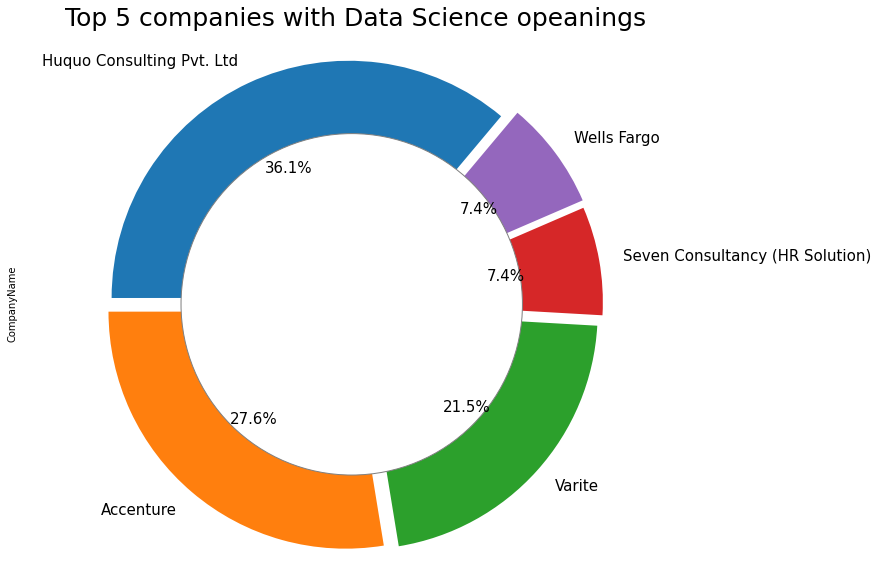

In [ ]:
df["CompanyName"].value_counts()[:5].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.06,0.07], startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Top 5 companies with Data Science opeanings",fontsize=25)
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

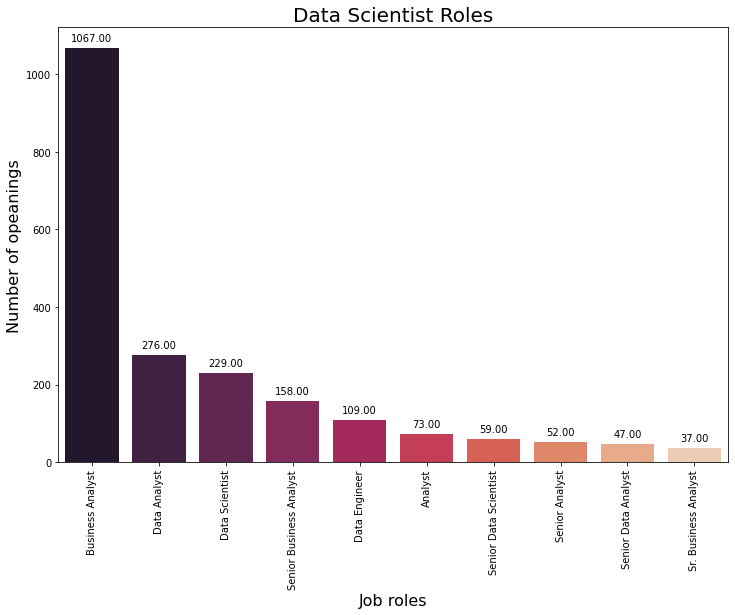

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Title", data=df, order = df['Title'].value_counts()[:10].index, palette="rocket")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Data Scientist Roles', fontsize=20)
ax.set_xlabel(xlabel='Job roles', fontsize=16)
ax.set_ylabel(ylabel='Number of opeanings', fontsize=16)
plt.xticks(rotation=90)

In [ ]:
df_temp=df.copy()

In [ ]:
df_temp.loc[df_temp['Title'].str.contains('Planner', case=False), 'Cleaned Title'] = 'Planner'

In [ ]:
df_temp.loc[df_temp['Title'].str.contains('Analyst', case=False), 'Cleaned Title'] = 'Analyst'
df_temp.loc[df_temp['Title'].str.contains('Analytics', case=False), 'Cleaned Title'] = 'Analyst'
df_temp.loc[df_temp['Title'].str.contains('Develop',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Title'].str.contains('Software',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Title'].str.contains('Web',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Title'].str.contains('App',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Title'].str.contains('Designer', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Title'].str.contains('Animation', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Title'].str.contains('Content', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Title'].str.contains('Consultant', case=False), 'Cleaned Title'] = 'Consultancy'
df_temp.loc[df_temp['Title'].str.contains('Risk', case=False), 'Cleaned Title'] = 'Risk analyst'
df_temp.loc[df_temp['Title'].str.contains('Call', case=False), 'Cleaned Title'] = 'Customer service'
df_temp.loc[df_temp['Title'].str.contains('Support',case=False),'Cleaned Title']='Customer service'
df_temp.loc[df_temp['Title'].str.contains('Customer support',case=False),'Cleaned Title']='Customer service'
df_temp.loc[df_temp['Title'].str.contains('Engineer',case=False),'Cleaned Title']='Core engineering'
df_temp.loc[df_temp['Title'].str.contains('Tech',case=False),'Cleaned Title']='Core engineering'
df_temp.loc[df_temp['Title'].str.contains('Prof',case=False),'Cleaned Title']='Academic role'
df_temp.loc[df_temp['Title'].str.contains('Business',case=False),'Cleaned Title']='Business Developer/Intelligence'
df_temp.loc[df_temp['Title'].str.contains('Social Media',case=False),'Cleaned Title']='Public Relations'
df_temp.loc[df_temp['Title'].str.contains('HR',case=False),'Cleaned Title']='Human Resources'
df_temp.loc[df_temp['Title'].str.contains('HR Executive',case=False),'Cleaned Title']='Human Resources'
df_temp.loc[df_temp['Title'].str.contains('Manager',case=False),'Cleaned Title']='Managerial role'
df_temp.loc[df_temp['Title'].str.contains('Fresher',case=False),'Cleaned Title']='Fresher role'
df_temp.loc[df_temp['Title'].str.contains('Account',case=False),'Cleaned Title']='Accounting role'
df_temp.loc[df_temp['Title'].str.contains('Intern',case=False),'Cleaned Title']='Internships'
df_temp.loc[df_temp['Title'].str.contains('Placement',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Title'].str.contains('Liaison',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Title'].str.contains('Recruit',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Title'].str.contains('Data',case=False),'Cleaned Title']='Data Science'
df_temp.loc[df_temp['Title'].str.contains('Sale',case=False),'Cleaned Title']='Sales Executive'
df_temp.loc[df_temp['Title'].str.contains('Health',case=False),'Cleaned Title']='Health Care'
df_temp.loc[df_temp['Title'].str.contains('Quality',case=False),'Cleaned Title']='Quality Control'
df_temp.loc[df_temp['Title'].str.contains('Tele',case=False),'Cleaned Title']='Telemarketing'

In [ ]:
df_temp['Cleaned Title'].value_counts()


Data Science                       2317
Business Developer/Intelligence    1428
Analyst                             766
Managerial role                     328
Core engineering                    215
Software/Web/App Developer          135
Consultancy                         135
Sales Executive                     105
Risk analyst                         60
Quality Control                      41
Academic role                        24
Fresher role                         19
Health Care                          19
Internships                          17
Customer service                     17
Human Resources                      16
Design and Creativity                13
Accounting role                       8
Placement & Liaison                   5
Telemarketing                         5
Public Relations                      3
Name: Cleaned Title, dtype: int64

In [ ]:
df_temp['Cleaned Title'].isna().value_counts()

False    5676
True      404
Name: Cleaned Title, dtype: int64

In [ ]:
df_temp.dropna(inplace=True)

In [ ]:
df_titles=pd.DataFrame(df_temp['Title'],columns=['Title','Count'])

In [ ]:
df_titles['Count']=1

In [ ]:
df_titles=df_titles.groupby('Title').sum()
df_titles

,Count
Title,
ACOE Sr Analyst,2
AEM Business Analyst/Product Owner - IT Firm,1
AI & Data Science Senior Engineer,1
AI Consultant,1
AI Data Scientist,5
...,...
market risk validation,1
ops Analyst,1
software development engineer 1,1


In [ ]:
df_titles.reset_index(inplace=True)
df_titles.sort_values('Count',ascending=False,inplace=True)
df_titles

,Title,Count
471,Business Analyst,482
946,Data Analyst,210
1287,Data Scientist,172
2605,Senior Business Analyst,95
1098,Data Engineer,77
...,...,...
1173,Data Engineering Associate Manager,1
1174,"Data Engineering Experts - ETL, Kafka, Scala, ...",1
1175,Data Engineering Head,1
1177,Data Engineering Lead/ Manager,1


In [ ]:
from wordcloud import WordCloud, STOPWORDS

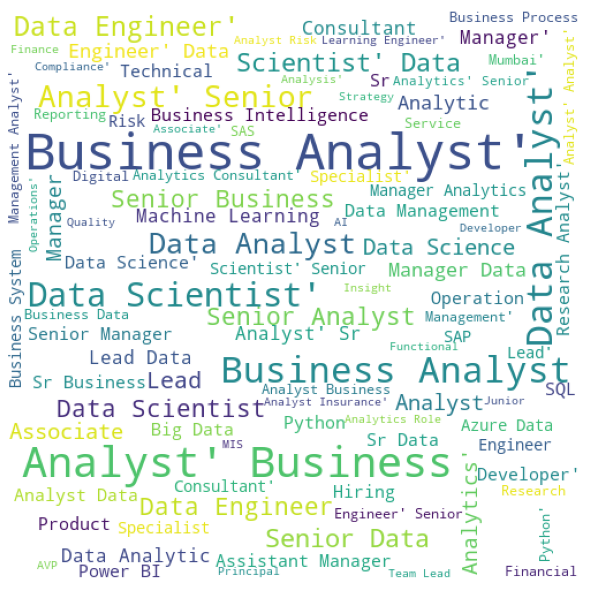

In [ ]:
imp_words = df_temp['Title'].to_list()

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(str(imp_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

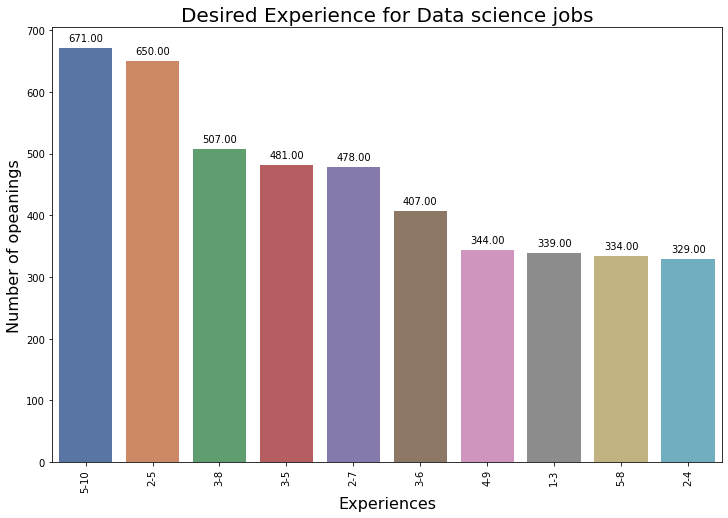

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Experience Needed", data=df, order = df['Experience Needed'].value_counts()[:10].index, palette="deep")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Desired Experience for Data science jobs', fontsize=20)
ax.set_xlabel(xlabel='Experiences', fontsize=16)
ax.set_ylabel(ylabel='Number of opeanings', fontsize=16)
plt.xticks(rotation=90)

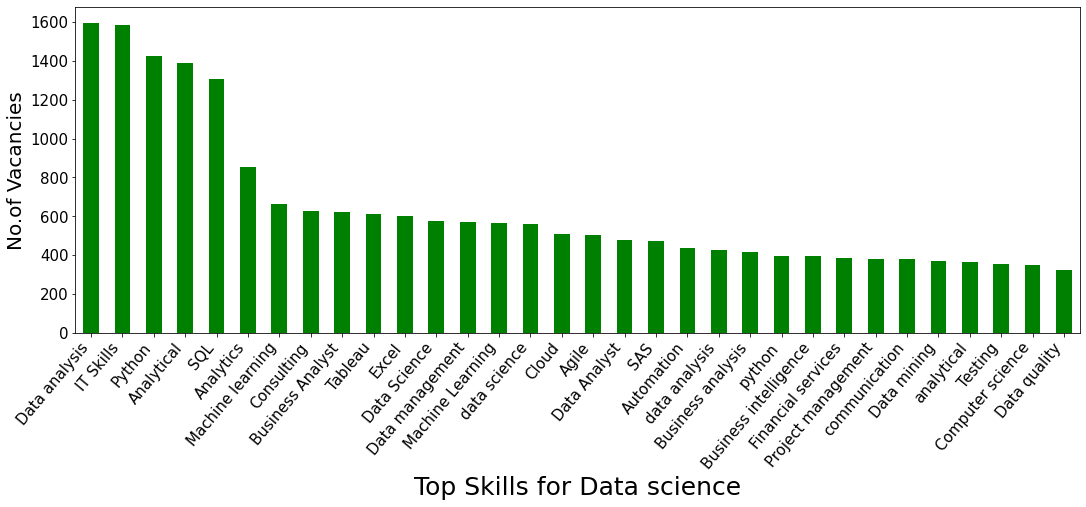

In [ ]:
df.skill.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="g")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

In [ ]:
df_skills=pd.DataFrame(df.skill.apply(pd.Series).stack().value_counts()).reset_index()
df_skills.columns=["skill","count"]
df_skills.head()

,skill,count
0,Data analysis,1595
1,IT Skills,1584
2,Python,1423
3,Analytical,1386
4,SQL,1305


In [ ]:
languages={}
languages["python"]=df_skills["count"][df_skills['skill'].str.contains('python', regex=True)].sum()
languages["r"]=df_skills["count"][df_skills['skill'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=df_skills["count"][df_skills['skill'].str.contains('matlab', regex=True)].sum()
languages["java"]=df_skills["count"][df_skills['skill'].str.contains('java$', regex=True)].sum()
languages["c++"]=df_skills["count"][df_skills['skill'].str.contains('c\+', regex=True)].sum()
languages["sas"]=df_skills["count"][df_skills['skill'].str.contains('sas', regex=True)].sum()
languages["sql"]=df_skills["count"][df_skills['skill'].str.contains('sql', regex=True)].sum()


#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

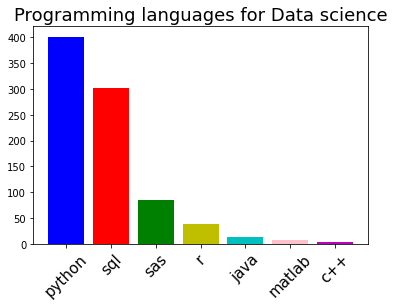

In [ ]:
plt.bar(languages.keys(),languages.values(),color=["b","r","g","y","c","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

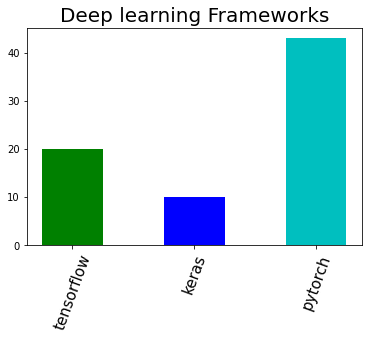

In [ ]:

frameworks={}
frameworks['tensorflow']=df_skills["count"][df_skills['skill'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=df_skills["count"][df_skills['skill'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=df_skills["count"][df_skills['skill'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()

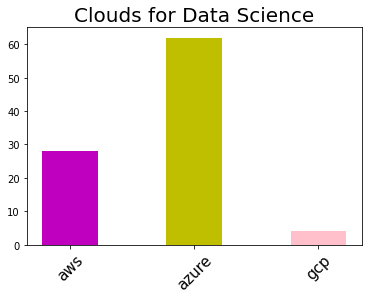

In [ ]:
cloud={}
cloud['aws']=df_skills["count"][df_skills['skill'].str.contains('aws', regex=True)].sum()
cloud['azure']=df_skills["count"][df_skills['skill'].str.contains('azure', regex=True)].sum()
cloud['gcp']=df_skills["count"][df_skills['skill'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

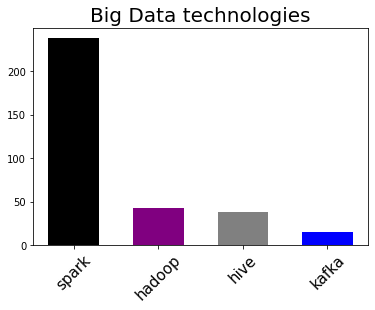

In [ ]:
bigdata={}
bigdata["spark"]=df_skills["count"][df_skills['skill'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=df_skills["count"][df_skills['skill'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=df_skills["count"][df_skills['skill'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=df_skills["count"][df_skills['skill'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

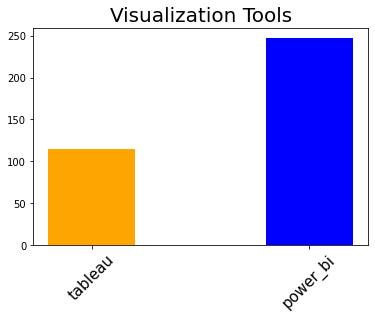

In [ ]:
# tools
tools={}
tools["tableau"]=df_skills["count"][df_skills['skill'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=df_skills["count"][df_skills['skill'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()

In [ ]:
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

In [ ]:
#lowercase
df["Text_1"] = df.Title.str.lower()
#remove \n
df["Text_2"] = df.CompanyName.str.replace("\\n", " ")
#remove punctuation and tokenize
df["Tokens"] = df.apply(lambda row: tokenizer.tokenize(row['Text_2']), axis=1)
#remove stopwords
df['Tokens_1'] = df['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])
#merge tokens back into string text
df['Text_3']=[" ".join(txt) for txt in df["Tokens_1"].values]
#create bigrams
df["Tokens_2"] = df["Tokens_1"].apply(lambda row: list(ngrams(row, 2)))
df.head()

,Title,CompanyName,Vacancy Link,Experience Needed,Salary,skill,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2
0,Actuarial Analyst,Tresbien Hr Consultancy,https://www.naukri.com/job-listings-actuarial-...,3-8 Yrs,"5,00,000 - 12,00,000 PA.",Data analysis\nArchitecture\ndevops\nConsultin...,actuarial analyst,Tresbien Hr Consultancy,"[Tresbien, Hr, Consultancy]","[Tresbien, Hr, Consultancy]",Tresbien Hr Consultancy,"[(Tresbien, Hr), (Hr, Consultancy)]"
1,Actuarial Analyst,Tresbien Hr Consultancy,https://www.naukri.com/job-listings-actuarial-...,3-8 Yrs,"5,00,000 - 12,00,000 PA.",Automation\nProcess optimization\nAnalytical\n...,actuarial analyst,Tresbien Hr Consultancy,"[Tresbien, Hr, Consultancy]","[Tresbien, Hr, Consultancy]",Tresbien Hr Consultancy,"[(Tresbien, Hr), (Hr, Consultancy)]"
2,AD-Market Risk,KPMG India,https://www.naukri.com/job-listings-ad-market-...,12-17 Yrs,Not disclosed,IT Skills\nSalesforce\nBusiness process\nData ...,ad-market risk,KPMG India,"[KPMG, India]","[KPMG, India]",KPMG India,"[(KPMG, India)]"
3,AD-Market Risk,KPMG India,https://www.naukri.com/job-listings-ad-market-...,12-17 Yrs,Not disclosed,Automation\nTechnical management\nUsage\nExcel...,ad-market risk,KPMG India,"[KPMG, India]","[KPMG, India]",KPMG India,"[(KPMG, India)]"
4,Advance Analytics Manager,Essence Digital,https://www.naukri.com/job-listings-advance-an...,3-5 Yrs,Not disclosed,Consulting\nQuality audit\nApplication develop...,advance analytics manager,Essence Digital,"[Essence, Digital]","[Essence, Digital]",Essence Digital,"[(Essence, Digital)]"


In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df.Title)
y

array([ 118,  118,   17, ..., 5303, 5304, 5305])

In [ ]:
v = TfidfVectorizer(max_features=100)
x = df["Text_3"]
v.fit(x)
v2={}
for a, b in v.vocabulary_.items():
    v2[b] = a

In [ ]:
print(v2.get(71))

research


In [ ]:
x_tfidf = v.transform(x)

In [ ]:
print(x_tfidf)

  (0, 41)	0.691106876736171
  (0, 19)	0.7227525751790683
  (1, 41)	0.691106876736171
  (1, 19)	0.7227525751790683
  (2, 45)	1.0
  (3, 45)	1.0
  (4, 26)	1.0
  (5, 26)	1.0
  (6, 91)	1.0
  (7, 91)	1.0
  (8, 45)	1.0
  (9, 45)	1.0
  (10, 68)	0.4497923022534837
  (10, 56)	0.43487304899430235
  (10, 42)	0.5885041032144189
  (10, 21)	0.5120890904829964
  (11, 68)	0.4497923022534837
  (11, 56)	0.43487304899430235
  (11, 42)	0.5885041032144189
  (11, 21)	0.5120890904829964
  (16, 76)	0.5679798411160097
  (16, 17)	0.581978908589406
  (16, 2)	0.581978908589406
  (17, 76)	0.5679798411160097
  (17, 17)	0.581978908589406
  :	:
  (9497, 83)	1.0
  (9498, 90)	1.0
  (9499, 75)	1.0
  (9500, 96)	1.0
  (9501, 45)	1.0
  (9504, 83)	0.3960134953488994
  (9504, 71)	0.6421114055594934
  (9504, 68)	0.3368707541222464
  (9504, 4)	0.5633687507921147
  (9506, 83)	0.4931397883641514
  (9506, 46)	0.8699500842761957
  (9511, 83)	1.0
  (9512, 41)	1.0
  (9513, 83)	0.5271459420640644
  (9513, 26)	0.8497747676681099
  (951

In [ ]:
s = svm.LinearSVC(C=1.0)
s.fit(x_tfidf, y)
s_pred = s.predict(x_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(s_pred, y)*100)

SVM Accuracy Score ->  13.876651982378855


In [ ]:
s.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.08420217e-19,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.88807256e-01, -3.46944695e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.73472348e-18,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
df["SVM_Prediction"] = s_pred

In [ ]:
df.head()

,Title,CompanyName,Vacancy Link,Experience Needed,Salary,skill,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2,SVM_Prediction
0,Actuarial Analyst,Tresbien Hr Consultancy,https://www.naukri.com/job-listings-actuarial-...,3-8 Yrs,"5,00,000 - 12,00,000 PA.",Data analysis\nArchitecture\ndevops\nConsultin...,actuarial analyst,Tresbien Hr Consultancy,"[Tresbien, Hr, Consultancy]","[Tresbien, Hr, Consultancy]",Tresbien Hr Consultancy,"[(Tresbien, Hr), (Hr, Consultancy)]",770
1,Actuarial Analyst,Tresbien Hr Consultancy,https://www.naukri.com/job-listings-actuarial-...,3-8 Yrs,"5,00,000 - 12,00,000 PA.",Automation\nProcess optimization\nAnalytical\n...,actuarial analyst,Tresbien Hr Consultancy,"[Tresbien, Hr, Consultancy]","[Tresbien, Hr, Consultancy]",Tresbien Hr Consultancy,"[(Tresbien, Hr), (Hr, Consultancy)]",770
2,AD-Market Risk,KPMG India,https://www.naukri.com/job-listings-ad-market-...,12-17 Yrs,Not disclosed,IT Skills\nSalesforce\nBusiness process\nData ...,ad-market risk,KPMG India,"[KPMG, India]","[KPMG, India]",KPMG India,"[(KPMG, India)]",1674
3,AD-Market Risk,KPMG India,https://www.naukri.com/job-listings-ad-market-...,12-17 Yrs,Not disclosed,Automation\nTechnical management\nUsage\nExcel...,ad-market risk,KPMG India,"[KPMG, India]","[KPMG, India]",KPMG India,"[(KPMG, India)]",1674
4,Advance Analytics Manager,Essence Digital,https://www.naukri.com/job-listings-advance-an...,3-5 Yrs,Not disclosed,Consulting\nQuality audit\nApplication develop...,advance analytics manager,Essence Digital,"[Essence, Digital]","[Essence, Digital]",Essence Digital,"[(Essence, Digital)]",770


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
job_exp = df["Experience Needed"].value_counts().nlargest(n=10)
job_exp_all = df["Experience Needed"].value_counts()
fig = make_subplots(1,2, 
                    subplot_titles = ["Top 10 experience ranges", 
                                      "All experience ranges"])
fig.append_trace(go.Bar(y=job_exp.index,
                          x=job_exp, 
                          orientation='h',
                          marker=dict(color=job_exp.values, coloraxis="coloraxis", showscale=False),
                          texttemplate = "%{value:,s}",
                          textposition = "inside",
                          name="Top 10 experience ranges",
                          showlegend=False),
                
                 row=1,
                 col=1)
fig.update_traces(opacity=0.7)
fig.update_layout(coloraxis=dict(colorscale='tealrose'))
fig.append_trace(go.Scatter(x=job_exp_all.index,
                          y=job_exp_all, 
                          line=dict(color="#008B8B",
                                    width=2),
                          showlegend=False),
                 row=1,
                 col=2)
fig.update_layout(showlegend=False)
fig.show()